In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm



In [ ]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 19.4MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')

df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df.columns)

df_test = pd.DataFrame(scaler.transform(df_test), columns=df.columns)

In [ ]:
y_train = df_train['selling_price']
X_train = df_train.drop('selling_price', axis=1)
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1)



In [ ]:
y_train = np.array(y_train)

In [ ]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.


In [ ]:
X_sm

,const,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.0,0.76,0.001163,0.182500,0.118335,0.077778,0.24,0.162167,0.137043,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,1.0,0.80,0.005637,0.110086,0.443276,0.413027,0.20,0.817302,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.84,0.013007,0.136810,0.216380,0.126892,0.16,0.162167,0.348682,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.68,0.027220,0.103103,0.373667,0.091948,0.32,0.301436,0.255563,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.64,0.013600,0.154310,0.206754,0.134879,0.36,0.205980,0.208197,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13869,1.0,0.92,0.005111,0.164655,0.147808,0.099903,0.08,0.166181,0.220812,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
13870,1.0,0.84,0.010375,0.118966,0.177429,0.131562,0.16,0.232771,0.245002,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
13871,1.0,0.80,0.007743,0.182500,0.118335,0.077778,0.20,0.162167,0.137106,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
13872,1.0,0.64,0.014060,0.069397,0.322719,0.185185,0.36,0.301436,0.232397,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_sm.shape

(13874, 18)

In [ ]:

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.512e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:21:59   Log-Likelihood:                 20675.
No. Observations:               13874   AIC:                        -4.132e+04
Df Residuals:                   13857   BIC:                        -4.119e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.619e+11   1.16e+11  

In [ ]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:22:00   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5834      0.009    729.235      0.0

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
X_t

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.486954,0.158764,-0.896858,0.040307,0.404950,0.486954,-0.168188,-0.473490,-0.803747,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,-2.023235,0.448465,-0.428013
1,0.763433,-0.429161,0.231029,-0.922002,-0.692532,-0.763433,-0.524700,-0.592231,1.244173,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
2,0.450836,1.316242,0.476821,-0.439884,-0.209961,-0.450836,-0.608249,-0.455186,1.244173,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,-2.023235,0.448465,-0.428013
3,1.076029,-0.277293,-0.308795,-0.540164,-0.252291,-1.076029,-0.201672,-0.315315,-0.803747,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
4,-1.112147,-0.190317,-0.759031,0.032593,0.264590,1.112147,-0.311621,-0.711439,1.244173,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,0.494258,0.448465,-0.428013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15851,1.388626,-0.534804,-1.337905,1.768220,1.106750,-1.388626,1.085036,2.454137,-0.803747,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,0.494258,-2.229827,2.336377
15852,1.076029,-0.730473,0.573300,-0.538236,-0.363688,-1.076029,-0.524700,-0.497558,1.244173,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
15853,0.450836,-0.290815,-0.968069,0.221583,0.516347,-0.450836,-0.311621,0.432089,-0.803747,-0.100003,-0.986220,-0.021016,-0.058458,1.025553,0.494258,0.448465,-0.428013
15854,-0.486954,-0.796615,-0.143402,1.000687,1.913264,0.486954,2.961284,2.522708,-0.803747,-0.100003,1.013972,-0.021016,-0.058458,-0.975083,-2.023235,0.448465,-0.428013


In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,year,inf
5,age,inf
13,Petrol,18.29
10,Diesel,17.29
16,>5,13.04
15,5,11.75
3,engine,6.30
7,model,6.16
4,max_power,5.02
6,make,3.33


In [ ]:
X_tr_scaled

array([[-0.48695362,  0.15876399, -0.89685782, ..., -2.02323478,
         0.4484653 , -0.42801318],
       [ 0.76343287, -0.42916149,  0.23102856, ...,  0.49425801,
         0.4484653 , -0.42801318],
       [ 0.45083625,  1.31624227,  0.47682051, ..., -2.02323478,
         0.4484653 , -0.42801318],
       ...,
       [ 0.45083625, -0.29081528, -0.96806857, ...,  0.49425801,
         0.4484653 , -0.42801318],
       [-0.48695362, -0.79661492, -0.14340215, ..., -2.02323478,
         0.4484653 , -0.42801318],
       [-0.174357  , -0.53939752, -1.03468508, ...,  0.49425801,
         0.4484653 , -0.42801318]])

NameError: name 'X2' is not defined

In [ ]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:22:13   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5834      0.009  

In [ ]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)
  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()

  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

            Features    VIF
1             Petrol  18.29
2             Diesel  17.29
3                 >5  13.04
4                  5  11.75
5             engine   6.30
6              model   6.16
7          max_power   5.02
8               make   3.33
9            mileage   3.24
0                age   1.92
10            Manual   1.79
11               LPG   1.25
12          Electric   1.23
13         km_driven   1.21
14        Individual   1.09
15  Trustmark Dealer   1.02
            Features    VIF
1                 >5  13.03
2                  5  11.73
3             engine   6.24
4              model   6.15
5          max_power   5.01
6               make   3.32
7            mileage   2.97
0             Diesel   2.18
8                age   1.91
9             Manual   1.79
11          Electric   1.23
12         km_driven   1.21
13        Individual   1.09
14  Trustmark Dealer   1.02
10               LPG   1.01
            Features   VIF
2              model  6.14
1             engine  

In [ ]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

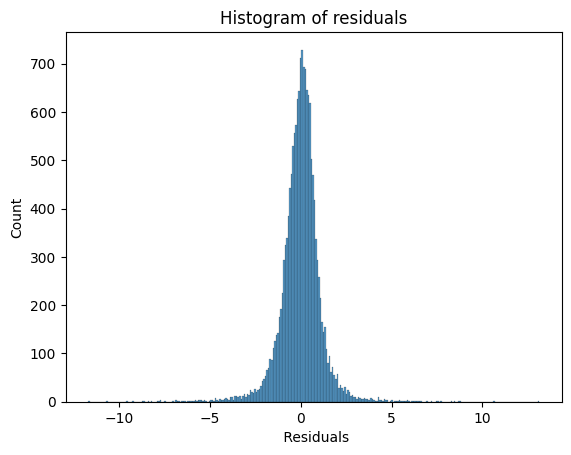

In [ ]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15856.
  res = hypotest_fun_out(*samples, **kwds)


np.float64(0.8901716755445348)

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

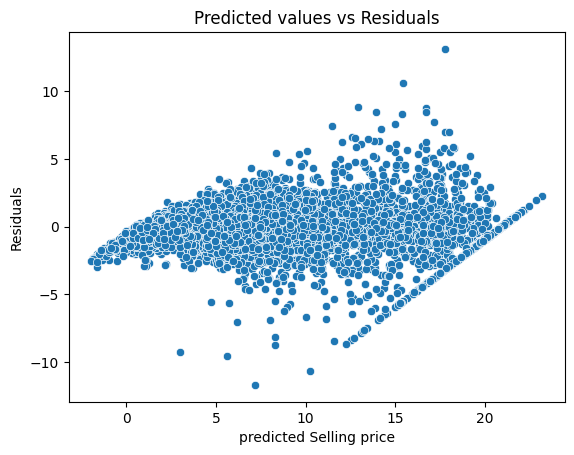

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', np.float64(1.0176613865185007)),
 ('p-value', np.float64(0.21807877686818042))]